# Cleaning, manipulating, and exploring data with pandas

In [1]:
# Import the pandas library as pd (callable in the code as pd)
import pandas as pd

In [2]:
# The csv data file location
csv_file_url = 'https://raw.githubusercontent.com/NCSU-Libraries/data-viz-instruction/main/MI_REU_2021/data/perovskite_DFT_EaH_FormE.csv'

# Read in the data file and print out the DataFrame
data_csv = pd.read_csv(csv_file_url)
data_csv.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Empty,Empty.1,Empty.2,Empty.3,Empty.4,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,270.007913,-1.746806


## Removing data
### Drop columns
Removing unnecessary columns of data using the DataFrame `drop()` method can simplify the dataset.

In [3]:
# Remove the empty columns using "drop()"
data_clean = data_csv.drop(columns=["Empty", "Empty.1", "Empty.2", "Empty.3", "Empty.4"])

# Print out the first five records of the DataFrame
data_clean.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806


## Calculating new data
### Calculating with Expressions
New columns can be created based on data in other columns. For example, the new column "Number of elements" is the number of columns that represent sites that are not null.

In [4]:
# Create a new column for the number of elements in a compound
data_clean['Number of elements'] = data_clean.loc[:, 'A site #1':'X site'].count(axis='columns')

# Print out the new column
data_clean.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335,4
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863,5
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607,4
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806,4


### Calculating with apply functions
New columns can also be created with the `apply` method, which uses functions to handle more complex manipulations of existing data.

In [5]:
# Create a function that returns "stable" or "unstable" based on the energy above hull
def is_stable(energy_above_hull):
    # less than 40meV/atom is stable
    if energy_above_hull < 40:
        return "Stable"
    # greater than 40meV/atom is unstable
    else:
        return "Unstable"

# Create a new column
# apply the function "is_stable" to each row of another column to populate the new column with data
data_clean['stability'] = data_clean["energy_above_hull (meV/atom)"].apply(is_stable)

# View the dataset
data_clean

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335,4,Stable
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863,5,Unstable
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607,4,Unstable
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5,Unstable
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806,4,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,1.588513,-2.438274,4,Stable
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,0.000000,-2.509888,4,Stable
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,0.000000,-2.479151,4,Stable
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,0.000000,-2.441538,4,Stable


## Replacing data
Data can be replaced in a column based on conditions, similar to "find and replace." For example, this replace method replaces element abbreviations with the full element name.

In [6]:
# Replace 'Sr' and 'Ca' abbreviations with "Strontium" and "Calcium"
data_clean['A site #2'].replace({'Sr': 'Strontium', 'Ca': 'Calcium'}, inplace=True)

# Print out the updated column of data
data_clean['A site #2'].head()

0    Strontium
1           Bi
2      Calcium
3           Cd
4           Dy
Name: A site #2, dtype: object

In [7]:
# Change the element names back to their abbreviations
data_clean['A site #2'].replace({'Strontium': 'Sr', 'Calcium': 'Ca'}, inplace=True)

# Print out the updated column of data
data_clean['A site #2'].head()

0    Sr
1    Bi
2    Ca
3    Cd
4    Dy
Name: A site #2, dtype: object

## Filtering data
### Conditional filtering
Data can be filtered using conditional statements to remove unecessary rows of data or observe a specific range of data.

In [8]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1
calcium = data_clean[data_clean['A site #1'] == 'Ca']

# Print out the filtered data
calcium

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
485,Ca2La6Co8O24,Ca,La,NaN,Co,NaN,NaN,O,50.025452,-1.693684,4,Unstable
486,Ca2La6Cr8O24,Ca,La,NaN,Cr,NaN,NaN,O,0.000000,-2.297925,4,Stable
487,Ca2La6Fe8O24,Ca,La,NaN,Fe,NaN,NaN,O,0.000000,-2.034384,4,Stable
488,Ca2La6Ga8O24,Ca,La,NaN,Ga,NaN,NaN,O,73.974147,-2.173541,4,Unstable
489,Ca2La6Mn8O24,Ca,La,NaN,Mn,NaN,NaN,O,32.789931,-2.086983,4,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...
616,Ca8Ni6Co2O24,Ca,NaN,NaN,Ni,Co,NaN,O,361.579777,-0.866839,4,Unstable
617,Ca8Ni7Co1O24,Ca,NaN,NaN,Ni,Co,NaN,O,378.453371,-0.824937,4,Unstable
618,Ca8Ni8O24,Ca,NaN,NaN,Ni,NaN,NaN,O,397.239965,-0.781123,3,Unstable
619,Ca8Ti8O24,Ca,NaN,NaN,Ti,NaN,NaN,O,12.448077,-2.774067,3,Stable


In [9]:
# Filter the data to only see only perovskite oxides with a formation energy greater than -1
high_fe = data_clean[data_clean['formation_energy (eV/atom)'] > -1]

# Print out the filtered data
high_fe

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5,Unstable
41,Ba2Sr6Ni8O24,Ba,Sr,NaN,Ni,NaN,NaN,O,258.828051,-0.801693,4,Unstable
54,Ba3Cd1Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,257.075963,-0.967393,5,Unstable
59,Ba4Ba4Mn2Fe6O24,Ba,Ba,NaN,Mn,Fe,NaN,O,271.906598,-0.931270,5,Unstable
62,Ba4Ca4Co4Ni4O24,Ba,Ca,NaN,Co,Ni,NaN,O,296.095913,-0.941304,5,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Sr8Fe1Ni7O24,Sr,NaN,NaN,Fe,Ni,NaN,O,243.428371,-0.908675,4,Unstable
1597,Sr8Ni6Co2O24,Sr,NaN,NaN,Ni,Co,NaN,O,241.664953,-0.906028,4,Unstable
1598,Sr8Ni7Co1O24,Sr,NaN,NaN,Ni,Co,NaN,O,252.767162,-0.864348,4,Unstable
1599,Sr8Ni8O24,Sr,NaN,NaN,Ni,NaN,NaN,O,263.543371,-0.822993,3,Unstable


In [10]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1 
# that also have a formation energy greater than -1
calcium_fe = data_clean[(data_clean['A site #1'] == 'Ca') & (data_clean['formation_energy (eV/atom)'] > -1)]

# Print out the filtered data
calcium_fe

# Show how many rows meet these requirements
calcium_fe.shape

(23, 12)

## Aggregating data
### Unique
The `unique()` method can be used to see the total number of unique values are in a column of data. It returns a list of each value.

In [11]:
# Create a list of the unique elements at B site #3 with unique()
b3_elements = data_clean['B site #3'].unique()

# Print out the unique species
b3_elements

array([nan, 'Hf', 'Co', 'Fe', 'Cu', 'Mo', 'Ni', 'W'], dtype=object)

In [12]:
# Get the length of the new array (How many unique elements are there?)
len(b3_elements)

8

### Value counts
Value counts show how many instances there are of each unique entry in a column and returns a Series.

In [13]:
# Count the occurance of unique values on the column 'A site #2'
a2_elements = data_clean['A site #2'].value_counts()

# Print out the value counts
a2_elements

Sr    162
Zn    144
Ca    143
Y     132
Ba    117
Pr    104
La     74
Ho     61
Sm     45
Gd     44
Dy     43
Nd     42
Sn     14
Cd     14
Bi     11
Mg      7
Ce      3
Er      1
Name: A site #2, dtype: int64

### Minimum, maximum, average
Aggregates like  minimum, maximum, and mean of values can be calculated in a DataFrame or Series. Examples include:

- `mean()` to find the average of a range
- `min()` to find the smallest value
- `max()` to find the largest value
- `sum()` to sum the values of a range

In [14]:
# Calculate the minimum values for each column
data_clean.min()

Material Composition            Ba1Sr7V8O24
A site #1                                Ba
B site #1                                Al
X site                                    O
energy_above_hull (meV/atom)              0
formation_energy (eV/atom)          -3.2085
Number of elements                        3
stability                            Stable
dtype: object

In [15]:
# Calculate the average mean for energy above hull
data_clean['energy_above_hull (meV/atom)'].mean()

105.53263270409896

The `agg()` method can call multiple aggregate functions at once.

In [16]:
# Calculate the minimum, maximum, and average for energy above hull
data_clean['energy_above_hull (meV/atom)'].agg(['min', 'max', 'mean'])

min       0.000000
max     956.831956
mean    105.532633
Name: energy_above_hull (meV/atom), dtype: float64

## Grouping data
`groupby()` groups data in the DataFrame by column values. This grouped data can be sorted and manipulated.

In [17]:
# Group the dataset by "A site #1"
by_a1 = data_clean.groupby('A site #1')

# This creates a groupby object that contains information about the groups
print(type(by_a1))

# Find the mean of numerical columns grouped by element at "A site #1"
by_a1.mean()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
A site #1,,,
Ba,137.132922,-1.695770,4.397089
Bi,123.009060,-1.115116,5.250000
Ca,166.410235,-1.593343,4.272059
Cd,298.368831,-0.699773,4.000000
Dy,63.461571,-2.317707,3.947368
Gd,30.053374,-2.574140,3.947368
Ho,417.751932,-1.766937,3.000000
La,69.231032,-2.131105,4.257396
Mg,636.339325,-0.898799,3.000000


`groupby()` can group data by multiple factors, too.

In [18]:
# Group the data by A site #1 and then A site #2 and get the mean of the numerical columns using .mean()
data_clean.groupby(['A site #1', 'A site #2']).mean()          

energy_above_hull (meV/atom)  formation_energy (eV/atom)  \
A site #1 A site #2                                                             
Ba        Ba                           271.906598                   -0.931270   
          Bi                           105.932321                   -1.616462   
          Ca                           239.308297                   -1.182568   
          Cd                           142.473483                   -1.680978   
          Ce                           108.880760                   -1.700416   
...                                           ...                         ...   
Y         Ba                           275.239004                   -1.395605   
          Ca                           221.246470                   -1.484484   
          Ho                            47.305564                   -2.348126   
          Sr                           170.047628                   -1.515276   
          Zn                           121.133217                   -1.864187   

                     Number of elements  
A site #1 A site #2                      
Ba        Ba                   5.000000  
          Bi                   4.727273  
          Ca                   4.846154  
          Cd                   5.000000  
          Ce                   4.000000  
...                                 ...  
Y         Ba                   5.000000  
          Ca                   5.000000  
          Ho                   4.000000  
          Sr                   5.000000  
          Zn                   4.714286  

[69 rows x 3 columns]

## Data Visualization

Pandas can be used in conjunction with the **matplotlib visualization library** to create basic charts, such as bar charts, line charts, and scatter plots.

Import the pyplot interface (`matplotlib.pyplot`) as `plt` to access the plotting functionality of matplotlib. Once imported, charts can be created by using the matplotlib integration with pandas data structures, which calls the method `plot()` on a DataFrame or Series.

In [19]:
# Import the matplotlib pyplot interface as plt (callable in the code as plt)
import matplotlib.pyplot as plt

### Create a Bar Chart

A bar chart is a simple way to compare values across categories.

In [20]:
# Get the value counts of unique elements in the column "A site #1"
a_site = data_clean['A site #1'].value_counts()

# Print the value counts
a_site

Ba    481
La    338
Pr    330
Sr    302
Y     258
Ca    136
Dy     19
Sm     19
Gd     19
Nd     19
Bi      4
Sn      1
Ho      1
Mg      1
Cd      1
Name: A site #1, dtype: int64

<AxesSubplot:>

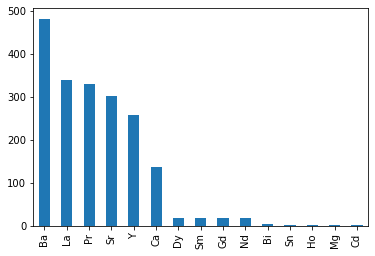

In [21]:
# Create a bar chart (kind="bar") with the labels (element names) along the horizontal
# axis and value counts (number of records) along the vertical axis
a_site.plot(kind='bar')

<AxesSubplot:>

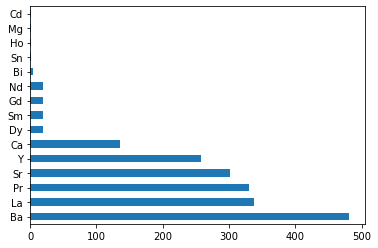

In [22]:
# Now create a horizontal bar chart (kind="barh") with the labels (element names) along 
# the vertical axis and value counts (number of records) along the horizontal axis
a_site.plot(kind='barh')

### Setting global chart styles

Basic graphic global paramenters can be set for the overall style of all plots.

In [23]:
# Set the default size of the plots to 10 inches wide and 8 inches tall
plt.rcParams['figure.figsize'] = [10,8]

In [24]:
# Set the default graphic style of the plots to 'ggplot'
plt.style.use('ggplot')

<AxesSubplot:>

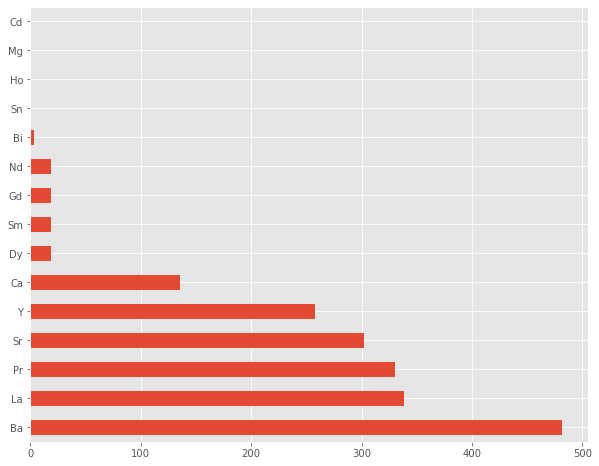

In [25]:
# Replot the horizontal bar chart with the updated style
a_site.plot(kind='barh')

### Create a Scatter Plot

Scatter plots are a standard graphing method for identifying a relationship between two variables.

<AxesSubplot:xlabel='eah', ylabel='fe'>

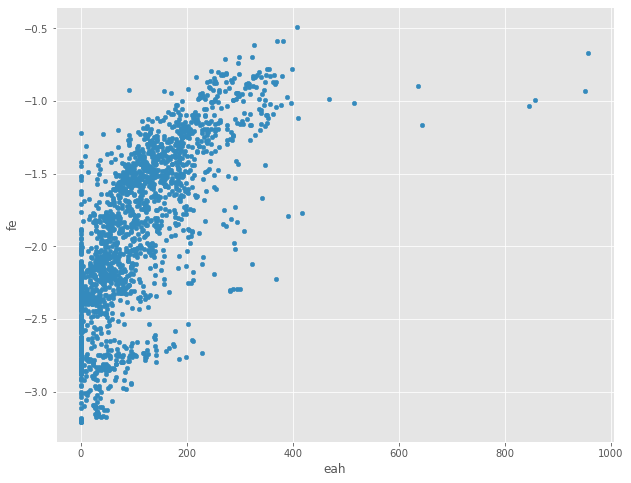

In [26]:
# Create new columns to simplify calling column names in plots
data_clean["eah"] = data_clean["energy_above_hull (meV/atom)"]
data_clean["fe"] = data_clean["formation_energy (eV/atom)"]

# Create a scatter plot (kind="scatter") to plot the energy above hull (x axis) vs the formation energy (y axis)
data_clean.plot(kind="scatter", x="eah", y="fe")

### Set the style of the plot

The graphical encoding of the plot data can be manipulated using the keyword arguments like `color` for color and `marker` to change the style of the points.

<AxesSubplot:xlabel='eah', ylabel='fe'>

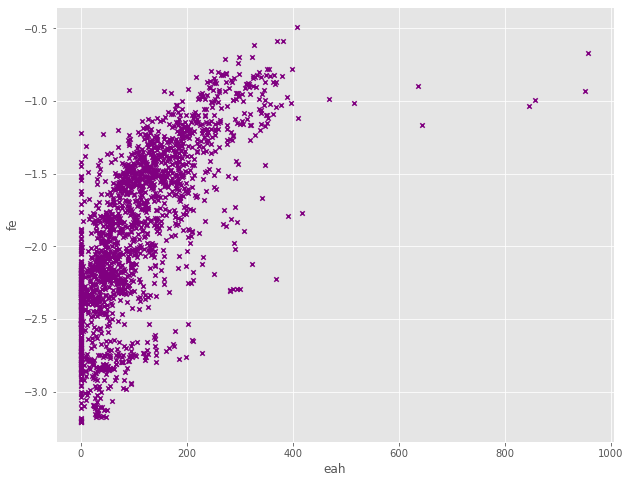

In [33]:
# Plot the energy above hull (x axis) vs the formation energy (y axis)
# Add keyword arguments to change the color to purple and the marker to "x"
data_clean.plot(kind="scatter", x="eah",
                y="fe", color='purple', marker="x")

To make the chart more descriptive and easy to interperet, create a plot title and axis labels. Store the plot as a matplotlib `Axes` object in a variable by calling the `plot()` method so that the methods `set_title()`, `set_xlabel()`, and `set_ylabel()` can be used on the variable to set a descriptive title, x axis label, and y axis label, respectively.

Text(0, 0.5, 'Formation Energy (eV/atom)')

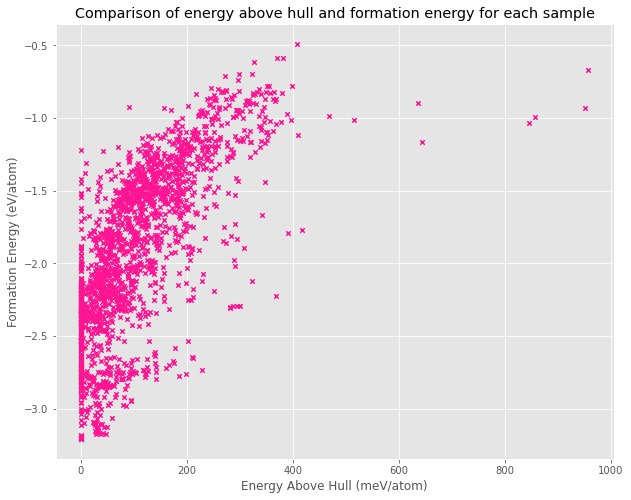

In [42]:
# Create a variable that stores the plot
scatter_plot = data_clean.plot(kind="scatter", x="eah", y="fe", color='deeppink', marker="x")

#Change titles and axis labels with set_title(), set_xlabel(), and set_ylabel()
scatter_plot.set_title("Comparison of energy above hull and formation energy for each sample")
scatter_plot.set_xlabel("Energy Above Hull (meV/atom)")
scatter_plot.set_ylabel("Formation Energy (eV/atom)")

### Other Data Visualization Libraries

`matplotlib` is not the only option for creating data visualizations, there are many other libraries that offer additional styling and interactive options.

#### Seaborn

Seaborn is a common visualization library that builds on matplotlib and provides more robust options for plot types and stylings.

In [43]:
# Import the seaborn library as sns (callable in the code as sns)
import seaborn as sns

<AxesSubplot:xlabel='eah', ylabel='fe'>

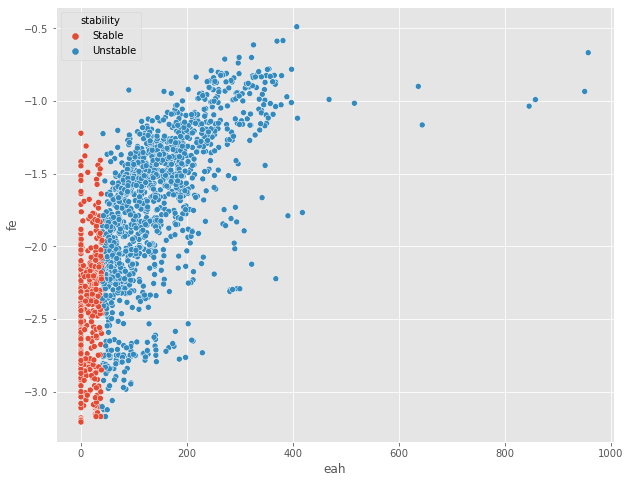

In [44]:
# Recreate the scatter plot of energy above hull vs formation energy with seaborn scatterplot()
sns.scatterplot(data=data_clean, x='eah',
                y='fe', hue='stability')

<AxesSubplot:xlabel='eah', ylabel='Count'>

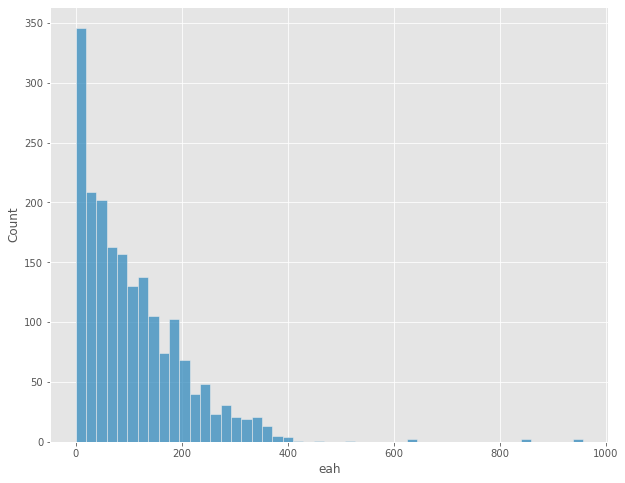

In [45]:
# Create a histogram of energy above hull values by calling histplot() with seaborn
sns.histplot(data=data_clean, x="eah")

<AxesSubplot:xlabel='Number of elements', ylabel='fe'>

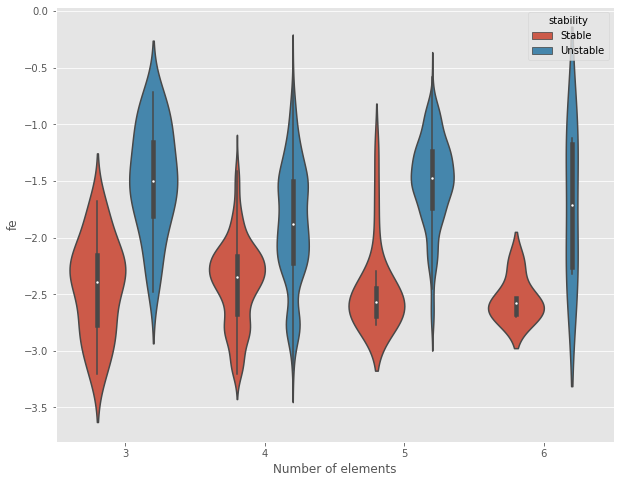

In [46]:
# Create violin plots of formation energy grouped by number of elements and stability
sns.violinplot(data=data_clean, y="fe",
               x="Number of elements", hue="stability")